#  Classifying Amazon Reviews

### Problem Definition

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries and Packages


In [16]:
import pandas as pd
import numpy as np

# For working with dictionaries
import collections
import operator

# For text cleaning
import re
import math
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
# WordCloud Visualization
from wordcloud import WordCloud

# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Term Features Matrix + Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmartinezflores\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Extraction

In [2]:
amazon_reviews_df = pd.read_table('C:/Users/fmartinezflores/Documents/Flatiron/DS-Deloitte-1003-c3/ClusteringAmazonReviews_2/ClusteringAmazonReviews/amazon_alexa.tsv')

amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
# Data frame overview. Column information, name-data type.
amazon_reviews_df.info()

# Counting missing values
amazon_reviews_df.isna().sum()

# Removing duplicate records
amazon_reviews_df = amazon_reviews_df.drop_duplicates()
#reviews_df['rating'].value_counts() # COUNTS FOR ANALISIS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [18]:
# Reviews Overview
_reviews = amazon_reviews_df['verified_reviews']

for i in _reviews:
    print(i)

Love my Echo!
Loved it!
Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
Music
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.
I think this is the 5th one I've purchased. I'm working on get

So far it has been fun to use and learn how to deal with Alexa. I am still learning and finding out what can really be done, plus I am in the process of making my house a smart house, so there is no much to control with Alexa yet.
I like the whole thing so far
Same specs as regular echo, but easier to use than getting a separate hub for smart lights, etc.
It's a great product with many good aspects, it easy to setup and control with intuitive straight forward instructions. The included lightbulb was excellent and worked perfectly. I very much enjoy this product and recommend it.
Not that much different than the one we had.  Alexa is still stubborn. LOL.  We ordered it on the Prime day to get the light bulbs with it i the deal but did not get the light bulbs.  When we called she said they were sold out.  Felt bad about that.  Now we have to buy light bulbs.
To have ability to play Amazon Music outside for patio gatherings. I also used blue tooth to connect Echo Plus via Alexa App on my 

## Cleaning

##### I use two different functions for cleaning, one for creating the vocabulary and other to create a new column in the data frame, this is beacause to work with the clustering algorithm I have to join all my words keeping them in Pandas Series format, in case of the vocabulary I just need a list of words

In [17]:
#  Getting rid of stop words and also removing short or long words. 
# This function cleans one word at a time from a set of words, in this case a "review".
def cleaning_revs(word, stop_words):
    word = word.lower()
   
    words = re.findall('[a-záéíóúüñ]+', word)# Making sure synopsis words dont have a-záéíóúüñ 
    
    new_words = [w for w in words if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return new_words 

# Function that joins all the cleaned words to use them in a 
def joining_revs(word,stop_words):
    
    clean_words = cleaning_revs(word, stop_words)
    vocabulary = " ".join(clean_words)
    return vocabulary       

# Function that cleans one review at a time by calling the above function 
# it returns a "Vocabulary", this is a list of lists, each list contains all words in a review
def clean_each_review(review):
        return joining_revs(review.strip(),s_w)

s_w = stopwords.words('english')
s_w += list(string.punctuation)
# More words that we can ignore to refine our vocabulary 
s_w.extend(['echo','alexa','amazon','dot','purchased','one', 'two','zzzzzzz','zzzz', 'device', 'thing'])

#### Creating new column in df with the cleaned reviews.

In [18]:
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['verified_reviews'].apply(lambda r: clean_each_review(r))
amazon_reviews_df.head(24)

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun old learns dinosaurs control lights pl...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,received gift needed another bluetooth somethi...
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,without cellphone cannot use many features ipa...
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,think working getting every room house really ...
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,looks great
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,love listened songs heard since childhood get ...


### Analysing 

#### Most Popular Words

In [72]:
def create_vocabulary(reviews, s_w):
    vocabulary = []    # Vocabulary joins all synopsis words with matching Genre and Decade 
    for rev in reviews :
        s = cleaning_revs(rev.strip(),s_w) # striping word from synopsis, this will clean a word at a time
        vocabulary.extend(s)

    return dict(collections.Counter(vocabulary))

repetitions = create_vocabulary(_reviews, s_w)

# Sorting the words in ascending order according to their number of repetitions, this way we find the most popular words
sorted_repetitions = sorted(repetitions.items(), key=operator.itemgetter(1), reverse=True)

#len(sorted_repetitions) # type: list, 3758
print("Top 25 Most Popular Words")
sorted_repetitions[:25]

Top 25 Most Popular Words


[('love', 746),
 ('great', 565),
 ('like', 387),
 ('use', 372),
 ('music', 369),
 ('works', 311),
 ('easy', 270),
 ('sound', 240),
 ('set', 231),
 ('good', 216),
 ('product', 207),
 ('get', 196),
 ('would', 185),
 ('home', 168),
 ('bought', 164),
 ('time', 156),
 ('speaker', 154),
 ('new', 152),
 ('still', 150),
 ('show', 149),
 ('really', 147),
 ('smart', 143),
 ('much', 142),
 ('also', 139),
 ('play', 138)]

In [73]:
x = ','.join(list(amazon_reviews_df['cleaned_reviews'].values)) 
x

'love,loved,sometimes playing game answer question correctly says got wrong answers like able turn lights away home,lot fun old learns dinosaurs control lights play games like categories nice sound playing music well,music,received gift needed another bluetooth something play music easily accessible found smart speaker wait see else,without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep fun ask random questions hear response seem smartbon politics yet,think working getting every room house really like features offer specifily playing music echos controlling lights throughout house,looks great,love listened songs heard since childhood get news weather information great,sent year old dad talks constantly,love learning knew things eveyday still figuring everything works far easy use understand make laugh times,mother knee problems give something trying come getting around fast like enjoys little big things play son

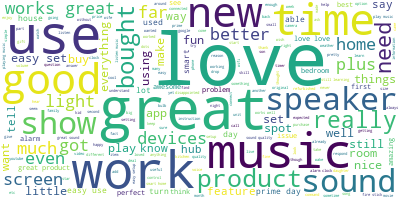

In [74]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(x)

# Visualize the word cloud
wordcloud.to_image()

#### Creating a vocabulary based on reviews

In [33]:
vocabulary = list(repetitions.keys()) # just words 
#print(vocabulary)

total_diff_words = len(vocabulary)
print("Different words in vocabulary: " ,  total_diff_words )  # How many different words?  + " different words in this vocabulary"

Different words in vocabulary:  3756


### K-Means

#### Creating Term Matrix 

In [1]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(amazon_reviews_df['cleaned_reviews'])

X.shape # There are 2435 vectors (one for each review), each with 949 dimensions (one for each word).

NameError: name 'TfidfVectorizer' is not defined

#### Fitting the model

In [37]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=30, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

amazon_reviews_df['cluster'] = clusters

amazon_reviews_df.head(25)

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,cluster
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,16
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learns dinosaurs control lig...,22
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,22
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,received gift needed another bluetooth somethi...,22
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,without cellphone cannot use many features ipa...,18
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,think working getting every room house really ...,23
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,looks great,10
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,love listened songs heard since childhood get ...,0


In [39]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
time,voice,great,control,best,devices,house,love,thing,get

Cluster 1
time,work,show,like,great,product,well,amazing,works,love

Cluster 2
watch,shows,works,apps,cable,use,easy,love,stick,fire

Cluster 3
fixed,forward,found,four,plus,kids,product,show,spot,love

Cluster 4
super,sound,works,install,setup,great,love,use,set,easy

Cluster 5
alarm,setup,easy,great,better,well,everything,arrived,works,expected

Cluster 6
info,space,like,device,gadget,works,great,sound,product,nice

Cluster 7
music,everything,like,fun,love,things,far,use,learning,still

Cluster 8
quality,new,well,sound,speaker,sounds,product,works,far,good

Cluster 9
wish,ones,work,daughter,mother,new,refurbished,loves,love,bought

Cluster 10
spot,thank,sounds,looks,price,buy,love,product,works,great

Cluster 11
way,could,work,like,cool,speaker,pretty,google,better,home

Cluster 12
satisfied,looks,great,device,office,worked,new,condition,works,perfect

Cluster 13
looks,love,far,great,brand,refurbished,charm,works,

### Probabilidad condicional

In [ ]:
"""
DON'T RUN THIS CELL
"""

from nltk.corpus import stopwords
import re

def clean_text(s):
    s = s.lower()
    words = re.findall('[a-záéíóúñ]+',s)
    return words

def llamarDatos(file):
    c_l = clean_text(file) 
    return  c_l

def unicas(linea):
    p_u = []
    for i in linea:
        if i not in p_u:
            p_u.append(i)
    return p_u

def jaccard(line1, line2):
    c = 0
    A = unicas(line1)
    B = unicas(line2)
    u = A + B
    AuB = unicas(u)
    for i, j in zip(A, B):
        if i == j:
            c+=1
    AiB = c
    AUB = len(AuB)
    j = AiB/AUB
    return j

        
d2 = {}
pu1 = ''
pu2 = ''
pu3 = ''
pu4 = ''

s_w = stopwords.words('spanish')
s_w = set(s_w)

with open('users.txt', 'r', encoding="utf-8") as users, open('posts.txt', 'r', encoding="utf-8") as posts:
    for nu, p in zip(users,posts):
        u = int(nu)
        p = p.strip()
        
        if  u == 1:
            pu1 += p 
        if u == 2:
            pu2 += p 
        if u == 3:
            pu3 += p 
        if u == 4:
            pu4 += p    
            

lnu = []

with open('users.txt', 'r', encoding="utf-8") as uN, open('labels.txt', 'r', encoding="utf-8") as labels:
    for u, l in zip(uN,labels):
        n = int(u)
        l = l.strip()
        if n not in lnu:
            lnu.append(u)
            d2.update({n:l})
    
    
d1 = {1:pu1,2:pu2,3:pu3,4:pu4}
#print('Diccionario 1: ', d1, '\n')

#print('Diccionario 2: ',d2)
print('\n')

#print(clean_post
    
clean_posts = []
#jf = []
j1 = []
j2 = []
j3 = []
j4 = []

for u in d1:
    p = clean_text(d1[u])
    clean_posts.append(p)

for i in range(4):
    for j in range(4):
        jr = jaccard(clean_posts[i], clean_posts[j])
        if i == 0:
            j1.append(jr)
        if i == 1:
            j2.append(jr)
        if i == 2:
            j3.append(jr)
        if i == 3:
            j4.append(jr)
            
jf =[j1,j2,j3,j4]       
print('Jaccard: ', jf)    
        

"""
for linea1, linea2 in zip(f1,f2):
        l1 = clean_text(linea1) # linea
        l2 = clean_text(linea2)
        jr = jaccard(l1,l2)
        print(jr)
        
        
for clave in mi_diccionario:
...  print clave, ": ", mi_diccionario[clave]

jr1 = jaccard(p1,p1)
        j_u1.append(jr1)
        jr2 = jaccard(p1,p2)
        j_u1.append(jr2)


In [ ]:
"""
DON'T RUN THIS CELL
"""
def cond_prob(l1, l2, A, B): # P(A|B)
    # P (A interseccion B)
    c1 = 0
    c2 = 0
    u = list(zip(l1, l2))
    t = len(u)
  
    for i in u:
        if i[1] == B: # si es hombre
            c2 += 1
            if i[0] == A: # si es hombre y esta muerto
                c1 += 1
        
    pAIB = c1 / t 
    pB = c2 / t
    pADB = pAIB / pB
    
    return pADB

lista1 = ['d','d','d','l','d','d','l'] # -> Estado
lista2 = ['m','m','m','m','w','w','w'] # -> Género

val1 = 'd' # muerto -> A
val2 = 'm' # hombre -> B

pA_B = cond_prob(lista1, lista2, val1, val2)
print(pA_B)
